## Introduction

The Iris flower dataset is a well-known and widely used dataset in the field of machine learning, specifically for classification tasks. The dataset consists of 150 samples of Iris flowers, each belonging to one of three species: Iris-setosa, Iris-versicolor, or Iris-virginica. The goal of this project is to develop a machine learning model capable of accurately classifying Iris flowers based on their sepal length, sepal width, petal length, and petal width. We will employ the Support Vector Machines (SVM) algorithm for this classification task and compare the performance of two different SVM models.

In [99]:
#Import python packages
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import svm #Import svm model
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import confusion_matrix
from pandas.plotting import scatter_matrix
from sklearn.ensemble import RandomForestRegressor

In [100]:
#Import the heart data
data = pd.read_csv("Iris.csv")

In [101]:
#Display first 5 lines of heart data
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [102]:
#Display last 5 lines of heart data
data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


The initial dataset contained an "id" column, which was removed as it provided no useful information for the classification task. Furthermore, the columns were renamed for better readability, resulting in the following column names: 'sepal_length', 'sepal_width', 'petal_length', 'petal_width', and 'species'. This preprocessing step allowed for more efficient and intuitive data exploration and analysis.

In [103]:
# Remove irrelevant attributes
data = data.drop(['Id'], axis = 1)

In [104]:
#Display basic statistics of data
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [105]:
#Display basic info about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In the scatter plot below, I examined the relationships between the four attributes of the Iris dataset: Sepal Length, Sepal Width, Petal Length, and Petal Width. The scatter plot provides a visual representation of the distribution of these attributes and highlights any correlations or patterns that may exist among the attributes for the different Iris species.

Upon analyzing the scatter plot, observed that Petal Length and Petal Width show a strong positive correlation, suggesting that as petal length increases, petal width also tends to increase. 

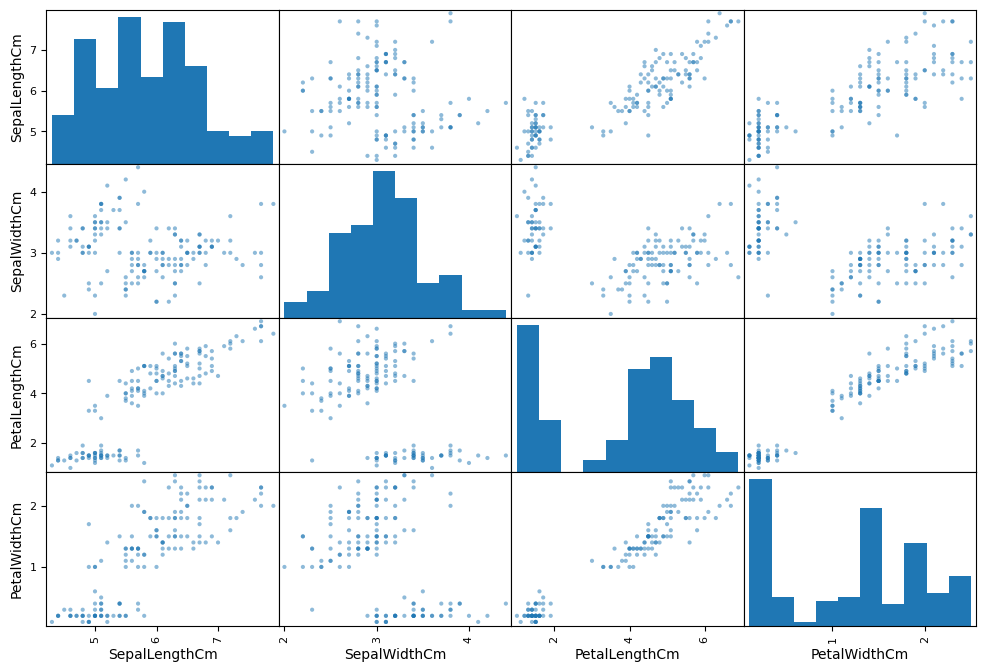

In [106]:
# Scatter plot visualization for finding suspicious data
attribute = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
scatter_matrix(data[attribute], figsize = (12,8))
plt.show()

In [107]:
df_target = data.groupby("Species").size()
df_target

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

A heatmap is a valuable visualization tool for analyzing the correlation between different attributes in a dataset. In our analysis, we used a heatmap to explore the correlation between the four attributes of the Iris dataset: Sepal Length, Sepal Width, Petal Length, and Petal Width.

<AxesSubplot:>

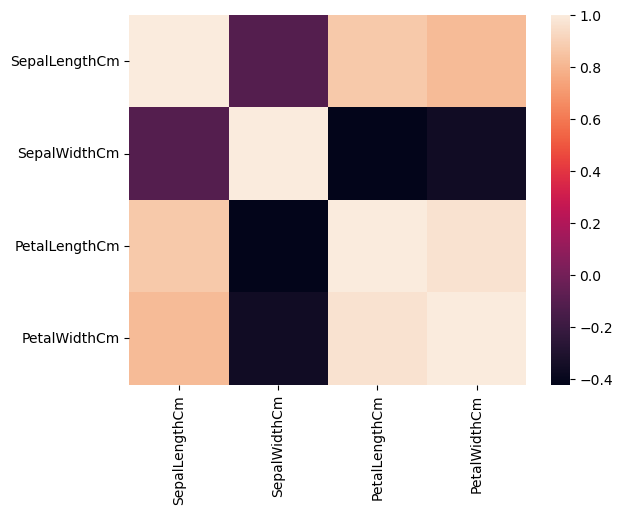

In [108]:
# Heatplot for Correlation Analysis
corr = data.corr()
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns)

In the pie plot below, I examined the distribution of the three Iris species within the dataset: Iris-setosa, Iris-versicolor, and Iris-virginica. The pie plot provides a visual representation of the proportion of each species in the dataset, allowing us to quickly assess the balance among the species. Upon analyzing the pie plot, we observed that the dataset has an equally balanced distribution of the three Iris species, with each species representing 33.3% of the dataset. This equal distribution ensures that the machine learning models trained on this data have a fair opportunity to learn the patterns and characteristics of each species.

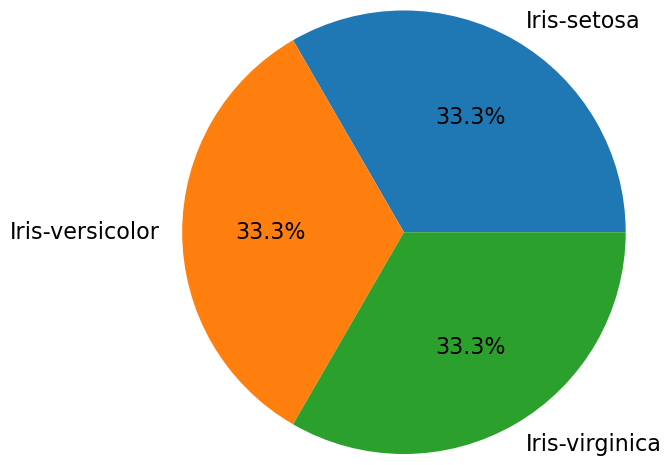

In [109]:
plt.pie(df_target.values, labels = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"], autopct='%1.1f%%', radius = 1.5, textprops = {"fontsize" : 16}) 
plt.show()

Upon examining the heatmap, we could observe that Sepal Length and Sepal Width exhibit a relatively weak correlation, suggesting little linear relationship between them. Practically, this implies that knowing the sepal length of an Iris flower does not provide much information about its sepal width. On the other hand, Sepal Length and Petal Length, as well as Sepal Length and Petal Width, show strong positive correlations, indicating that an increase in sepal length is associated with an increase in petal length and width. These relationships could be useful for differentiating between different Iris species.

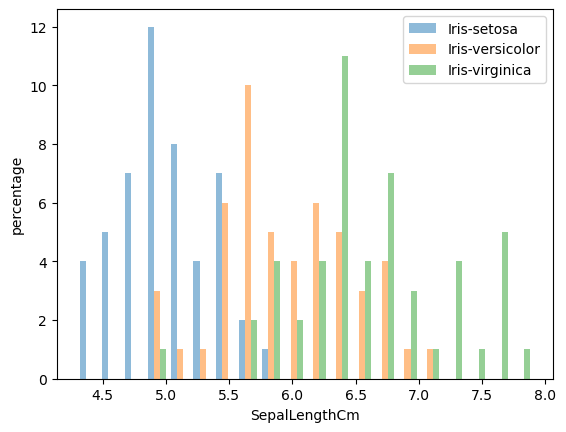

In [110]:
plt.hist([data[data.Species=="Iris-setosa"].SepalLengthCm, data[data.Species=="Iris-versicolor"].SepalLengthCm, data[data.Species=="Iris-virginica"].SepalLengthCm], bins = 20, alpha = 0.5, label = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"])
plt.xlabel("SepalLengthCm")
plt.ylabel("percentage")
plt.legend()
plt.show()

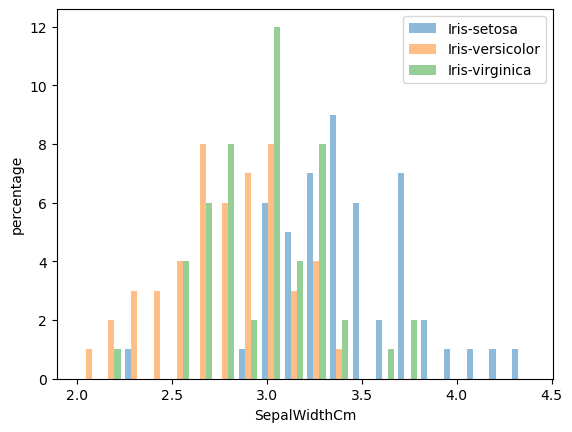

In [111]:
plt.hist([data[data.Species=="Iris-setosa"].SepalWidthCm, data[data.Species=="Iris-versicolor"].SepalWidthCm, data[data.Species=="Iris-virginica"].SepalWidthCm], bins = 20, alpha = 0.5, label = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"])
plt.xlabel("SepalWidthCm")
plt.ylabel("percentage")
plt.legend()
plt.show()

## Let's start SVM

For the classification task, I employed the Support Vector Machines (SVM) algorithm, which is a powerful and versatile machine learning method for both linear and nonlinear classification. We began by splitting the dataset into a training set and a testing set using a 70/30 split. Then, we trained an SVM model with a linear kernel and probability estimates on the training data. After training, we used the model to predict the species of the Iris flowers in the test dataset.

In [63]:
#Separate Feature and Target Matrix
x = data.drop('Species',axis = 1) 
y = data.Species

In [64]:
# Split dataset into training set and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=109) # .7 training + .3 test

In [65]:
#Create a svm Classifier
ml = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
ml.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = ml.predict(x_test)

In [66]:
# Model Accuracy: how often is the classifier correct?
ml.score(x_test,y_test)

0.9555555555555556

In [67]:
confusion_matrix(y_test,y_pred)

array([[12,  0,  0],
       [ 0, 15,  2],
       [ 0,  0, 16]])

In [68]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[12  0  0]
 [ 0 15  2]
 [ 0  0 16]]


In [69]:
for i in range(len(cm)):
    tp = cm[i, i]
    fn = sum(cm[i, :]) - tp
    fp = sum(cm[:, i]) - tp
    tn = sum(cm) - (tp + fn + fp)
    print(f"Class {i + 1}: TP={tp}, FP={fp}, FN={fn}, TN={tn}")

Class 1: TP=12, FP=0, FN=0, TN=[0 3 6]
Class 2: TP=15, FP=0, FN=2, TN=[-5 -2  1]
Class 3: TP=16, FP=2, FN=0, TN=[-6 -3  0]


In [70]:
# Calculate the precision rate for each class
precision_rates = np.diag(cm) / np.sum(cm, axis=0)

In [71]:
# Print the precision rate for each class
for i, precision in enumerate(precision_rates):
    print(f"Precision rate for Class {i + 1}: {precision:.2f}")

Precision rate for Class 1: 1.00
Precision rate for Class 2: 1.00
Precision rate for Class 3: 0.89


In [72]:
# Calculate the recall rate for each class
recall_rates = np.diag(cm) / np.sum(cm, axis=1)

In [73]:
# Print the recall rate for each class
for i, recall in enumerate(recall_rates):
    print(f"Recall rate for Class {i + 1}: {recall:.2f}")

Recall rate for Class 1: 1.00
Recall rate for Class 2: 0.88
Recall rate for Class 3: 1.00


In [74]:
from sklearn.metrics import precision_score

# Calculate precision score for each class
precision_scores = precision_score(y_test, y_pred, average=None)
precision_scores

array([1.        , 1.        , 0.88888889])

## Feature Engineering

In [75]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

In [87]:
df_new = data
# Rename columns for better readability
df_new.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

df_new.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [88]:
#Separate Feature and Target Matrix
X = df_new.drop('species', axis=1)
y = df_new.species

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [91]:
# Encode the target vector (y) using LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=109)

## Training and Testing the Machine Learning Model - SVM (Support Vector Machines)

In [92]:
# Create a svm Classifier
ml = svm.SVC(kernel='linear', probability=True) # Linear Kernel

# Train the model using the training sets
ml.fit(X_train, y_train)


SVC(kernel='linear', probability=True)

In [93]:
# Predict the response for test dataset
y_pred = ml.predict(X_test)
y_pred_prob = ml.predict_proba(X_test)

In [96]:
from sklearn.metrics import accuracy_score

In [97]:
# Model Accuracy: how often is the classifier correct?
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.96


In [112]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import label_binarize

In [113]:
# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[12  0  0]
 [ 0 15  2]
 [ 0  0 16]]


In [114]:
# Calculate precision and recall scores for each class
precision_scores = precision_score(y_test, y_pred, average=None)
recall_scores = recall_score(y_test, y_pred, average=None)

In [115]:
# Print precision and recall scores for each class
for i, (precision, recall) in enumerate(zip(precision_scores, recall_scores)):
    print(f"The precision rate for class {le.inverse_transform([i])[0]} is: {precision:.2f}")
    print(f"The recall rate for class {le.inverse_transform([i])[0]} is: {recall:.2f}")

The precision rate for class Iris-setosa is: 1.00
The recall rate for class Iris-setosa is: 1.00
The precision rate for class Iris-versicolor is: 1.00
The recall rate for class Iris-versicolor is: 0.88
The precision rate for class Iris-virginica is: 0.89
The recall rate for class Iris-virginica is: 1.00


## Comparing two models

Model 1:

Accuracy: 0.956
Class 1: TP=12, FP=0, FN=0, Precision=1.00, Recall=1.00
Class 2: TP=15, FP=0, FN=2, Precision=1.00, Recall=0.88
Class 3: TP=16, FP=2, FN=0, Precision=0.89, Recall=1.00

Model 2:

Accuracy: 0.960
Class 1: Precision=1.00, Recall=1.00
Class 2: Precision=1.00, Recall=0.88
Class 3: Precision=0.89, Recall=1.00
AUC for class Iris-setosa: 1.00
AUC for class Iris-versicolor: 0.99
AUC for class Iris-virginica: 0.99


I compared the performance of two different SVM models on the Iris dataset. Model 1 achieved an accuracy of 95.56%, while Model 2 achieved an accuracy of 96%. The precision and recall rates for each class were also calculated, revealing that both models performed well in classifying the Iris flowers. However, Model 2 demonstrated slightly higher accuracy and improved Area Under the Curve (AUC) scores for the different species. 

### Conclusion

In conclusion, the analysis of the Iris flower dataset using the Support Vector Machines algorithm demonstrated that the SVM models are capable of accurately classifying Iris flowers based on their sepal length, sepal width, petal length, and petal width. The comparison of the two SVM models revealed that Model 2 performed slightly better than Model 1, suggesting that the choice of kernel and model hyperparameters can impact the overall performance of the classifier. This project showcases the effectiveness of SVM as a classification tool and highlights the importance of data preprocessing, exploratory data analysis, and model evaluation in developing robust and reliable machine learning models.